<a href="https://colab.research.google.com/github/EdithOroche/IA/blob/main/Simulacion_de_Sistemas_Guia_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Simulación
## Modelo de linea de espera con un servidor

> El tiempo que transcurre entre la llegada de ciertas piezas a una estación de inspección sigue una distribución exponencial con media de $5$ minutos/pieza. El proceso está a cargo de un operario, y la duración de la inspección sigue una distribución normal con media de $4.0$ y desviación estándar de $0.5$ minutos/pieza. Calcule el tiempo promedio de permanencia de las piezas en el proceso de inspección.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

### 1. Tabla de eventos

<table>
<tr>
<th> Variable de estado <th> <th> Tiempo en el sistema de inspección (7) <th> <tr>
<tr>
<td> Entidades <td><td> Piezas <td>
<tr>
<td> Eventos <td><td> Tiempo de llegada (2) <br> Fin de la inspección (5) <td>
<tr>
<td> Evento secundario <td><td> Inicio de la inspección (3) <td>
<tr>
<tr>
<td> Actividades <td><td> Tiempo entre llegadas (1) <br> Tiempo de inspección (4) <td>
<tr>
<table>

# 2. Relaciones lógico-matemáticas entre elementos.

*   El **tiempo entre llegadas (1)** es una variable aleatoria, que se simula por medio de $np.random.rand$ y la función generadora de variables eponenciales $E_i=-5\ln(1-r_i)$.
*   El evento **tiempo de llegada (2)** de la pieza corresponde al valor acumulado de **tiempo entre llegadas (1)**.
*   Si se toma en cuenta que solamente existe un operario encargado de la tarea, el **inicio de la inspección (3)** puede ocurrir cuando la pieza entra al sistema, esto, en caso de que el operario esté **ocioso (2)**, o bien cuando **termina de inspeccionar la pieza anterior (5)**.
*   El **tiempo de inspección (4)** es una variable aleatoria normal con media $4.0$ y desviación estándar de $0.5$, generada mediante la función interna normal acumulada inversa $norm.ppf$ y como probabilidad del generador de números aleatorios $np.random.rand$.
*   El **fin de la inspección (5)** se calcula sumando el **tiempo de inspección (4)** al tiempo de **inicio de inspección (3)**.
*   Si bien no forma parte del bojetivo del ejemplo, también es posible determinar el **tiempo de espera** de una pieza antes de ser inspeccionada, ya que es igual a la diferencia entre el tiempo de **inicio de la inspección (3)** y el **tiempo de llegada (2)** de cada pieza.
*   Finalmente calcularemos el tiempo promedio deinspección como promedio móvil: cada vez que una nueva pieza es simulada, el tiempo promedio de inspección se recalcula.

### 2.1 Tiempo entre llegadas

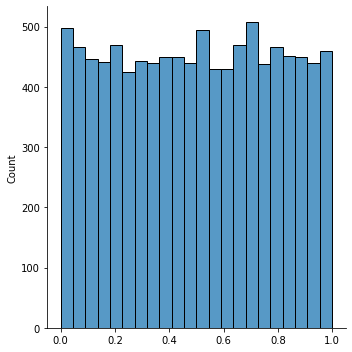

In [ ]:
aleatorios = np.random.rand(10000)
sns.displot(None, x = aleatorios)

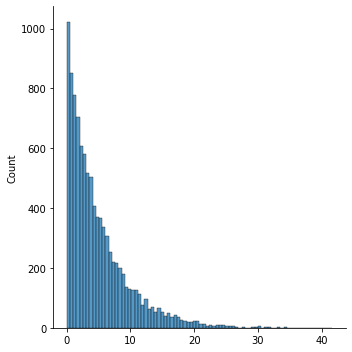

In [ ]:
tiempo_entre_llegadas = -5*np.log(1-aleatorios)
sns.displot(None, x = tiempo_entre_llegadas)

### 2.2 Tiempo de llegada

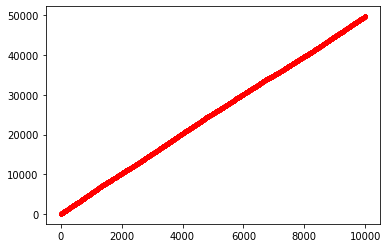

In [ ]:
tiempo_de_llegada = np.cumsum(tiempo_entre_llegadas)
plt.plot(range(len(tiempo_de_llegada)),tiempo_de_llegada, marker=".", color="red")
plt.show()

### 2.3 Tiempo de inspección

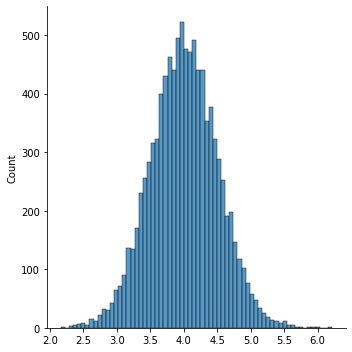

In [ ]:
aleatorios2 = np.random.rand(10000)
tiempo_de_inspección = norm.ppf(aleatorios2, loc=4, scale=0.5)
sns.displot(None, x = tiempo_de_inspección)

## 3. Simulación del proceso

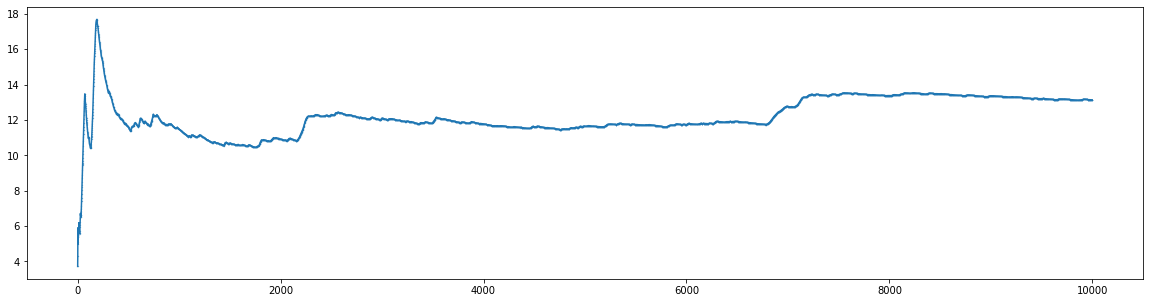

In [ ]:
inicio_de_la_inspeccion = [ tiempo_de_llegada[0] ]
fin_de_la_inspeccion = []
tiempo_en_inspeccion = []
tiempo_en_espera = []
tiempo_promedio_en_inspeccion = []
for pieza in range(0,10000):
  fin_de_la_inspeccion.append(inicio_de_la_inspeccion[-1] + tiempo_de_inspección[pieza])
  tiempo_en_inspeccion.append(fin_de_la_inspeccion[-1] - tiempo_de_llegada[pieza])
  tiempo_en_espera.append(inicio_de_la_inspeccion[-1] - tiempo_de_llegada[pieza])

  tiempo_promedio_en_inspeccion.append(np.mean(tiempo_en_inspeccion))

  if pieza != 9999:
    inicio_de_la_inspeccion.append(max(fin_de_la_inspeccion[-1],tiempo_de_llegada[pieza+1]))

plt.figure(figsize=(20,5))
plt.plot(range(10000),tiempo_promedio_en_inspeccion, marker=".", markersize=0.5)
plt.show()

In [ ]:
df = pd.DataFrame(list(zip(
    tiempo_entre_llegadas,
    tiempo_de_llegada,
    inicio_de_la_inspeccion,
    tiempo_de_inspección,
    fin_de_la_inspeccion,
    tiempo_en_inspeccion,
    tiempo_en_espera,
    tiempo_promedio_en_inspeccion)),
    columns =[
              'Tiempo entre llegadas',
              'Tiempo de llegada',
              'Inicio de la inspeccion',
              'Tiempo de inspeccion',
              'Fin de la inspeccion',
              'inspeccion + espera',
              'Tiempo en espera',
              'Tiempo promedio en inspeccion'])
df

,Tiempo entre llegadas,Tiempo de llegada,Inicio de la inspeccion,Tiempo de inspeccion,Fin de la inspeccion,Tiempo de inspeccion,Tiempo en espera,Tiempo promedio en inspeccion
0,27.804829,27.804829,27.804829,3.717501,31.522330,3.717501,0.000000,3.717501
1,2.571629,30.376458,31.522330,3.717796,35.240126,4.863668,1.145873,4.290585
2,0.875306,31.251764,35.240126,5.142470,40.382596,9.130833,3.988363,5.904001
3,10.241745,41.493508,41.493508,3.714663,45.208171,3.714663,0.000000,5.356666
4,17.501290,58.994798,58.994798,4.051881,63.046679,4.051881,0.000000,5.095709
...,...,...,...,...,...,...,...,...
9995,2.477873,49744.297449,49754.783059,3.330603,49758.113661,13.816212,10.485610,13.137841
9996,1.164495,49745.461944,49758.113661,4.235340,49762.349001,16.887057,12.651717,13.138216
9997,13.754167,49759.216111,49762.349001,4.745777,49767.094778,7.878667,3.132890,13.137690
9998,1.697371,49760.913482,49767.094778,3.665386,49770.760164,9.846683,6.181296,13.137361


## 4. Replicas

In [ ]:
tamanho_replica = 2000
num_replicas = 100

In [ ]:
def simulacion_replica():
  aleatorios = np.random.rand(tamanho_replica)
  tiempo_entre_llegadas = -5*np.log(1-aleatorios)
  tiempo_de_llegada = np.cumsum(tiempo_entre_llegadas)
  aleatorios2 = np.random.rand(tamanho_replica)
  tiempo_de_inspección = norm.ppf(aleatorios2, loc=4, scale=0.5)
  inicio_de_la_inspeccion = [ tiempo_de_llegada[0] ]
  fin_de_la_inspeccion = []
  tiempo_en_inspeccion = []
  tiempo_en_espera = []
  tiempo_promedio_en_inspeccion = []
  for pieza in range(0,tamanho_replica):
    fin_de_la_inspeccion.append(inicio_de_la_inspeccion[-1] + tiempo_de_inspección[pieza])
    tiempo_en_inspeccion.append(fin_de_la_inspeccion[-1] - tiempo_de_llegada[pieza])
    tiempo_en_espera.append(inicio_de_la_inspeccion[-1] - tiempo_de_llegada[pieza])

    tiempo_promedio_en_inspeccion.append(np.mean(tiempo_en_inspeccion))

    if pieza != tamanho_replica-1:
      inicio_de_la_inspeccion.append(max(fin_de_la_inspeccion[-1],tiempo_de_llegada[pieza+1]))

  return tiempo_promedio_en_inspeccion

0  10  20  30  40  50  60  70  80  90  

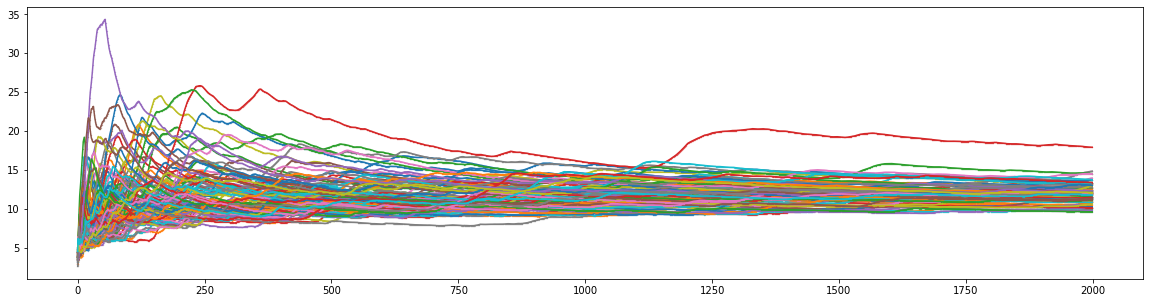

In [ ]:
replica_tiempo_promedio_en_inspeccion = []

plt.figure(figsize=(20,5))

for replica in range(0,num_replicas):
  replica_tiempo_promedio_en_inspeccion.append(simulacion_replica())
  if replica%10 == 0:
    print(replica," ",end="")
  plt.plot(range(tamanho_replica),replica_tiempo_promedio_en_inspeccion[replica], marker=".", markersize=0.5)
plt.show()

Media: 11.974326377802479 minutos/pieza
Desviación estándar: 1.262301551143222 minutos/pieza


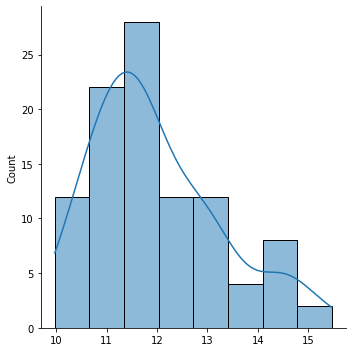

In [ ]:
promedio_final_replica = []
for replica in range(0,num_replicas):
  promedio_final_replica.append(replica_tiempo_promedio_en_inspeccion[replica][-1])

sns.displot(None, x = promedio_final_replica, kde=True)
print("Media:", np.mean(promedio_final_replica), "minutos/pieza")
print("Desviación estándar:", np.std(promedio_final_replica), "minutos/pieza")